In [12]:
# ignore if the module is installed in path
import sys
sys.path.append("../")

# import main module
from rppca import Design, randomized_svd, Design1d

# numerical ingredients
import numpy as np
import pandas as pd
import scipy.sparse as sparse
import scipy.io as io
from scipy.sparse.linalg import LinearOperator

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from threadpoolctl import threadpool_limits

In [14]:
AInv = io.mmread('../datasets/pedAInv.mtx')
LInv = io.mmread('../datasets/pedLInv.mtx')
pop_label = pd.read_csv('../datasets/popLabel.csv').x

In [31]:
LInv2 = io.mmread('../../../Dropbox/Code/PedPCA/pedLInv.mtx')
pop_label2 = pd.read_csv('../../../Dropbox/Code/PedPCA/LabGenYearCoatColour2025.csv').Coat_Colour

In [16]:
type(AInv)

scipy.sparse._coo.coo_matrix

In [17]:
type(AInv.toarray())

numpy.ndarray

In [18]:
AInv.toarray()

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 6.5       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 5.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 5.45607468, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 5.53645119,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        4.9972559 ]], shape=(2650, 2650))

In [19]:


# new implementation
with threadpool_limits(limits=1, user_api='blas'):
    %time design = Design(LInv.tocsc())
    %time U, S, V = randomized_svd(design, n_components=10, n_iter=1, seed=0)



CPU times: user 170 μs, sys: 12 μs, total: 182 μs
Wall time: 187 μs
CPU times: user 5.15 ms, sys: 892 μs, total: 6.04 ms
Wall time: 5.71 ms


In [20]:


# eigsh implementation
with threadpool_limits(limits=1, user_api='blas'):
    # use a lambda function define the mv function
    design = Design1d(LInv.tocsc())
    f_mv = lambda x: design.dot_left(design.dot_right(x))
    # the matvec implemented by numba is type-sensitive
    # hence, dtype should be specified in the LinOp definition
    lop = LinearOperator(LInv.shape, matvec=f_mv, dtype=np.float64)
    # 
    %time es, eu = sparse.linalg.eigsh(lop, k=10)



CPU times: user 20.2 ms, sys: 936 μs, total: 21.1 ms
Wall time: 20.4 ms


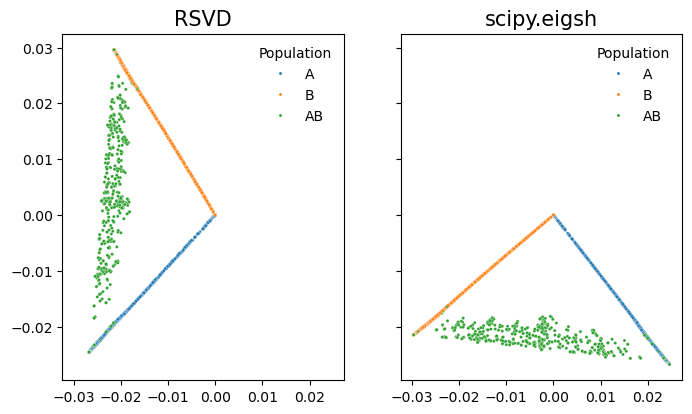

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(8,4.5), sharex=True, sharey=True)

# RSVD 
ax[0].set_title('RSVD', fontsize=15)
sns.scatterplot(x=-U[:,0], y=U[:,1], s=5, ax=ax[0],hue=pop_label)

# scipy-eigsh
# the return value is in an ascending order w.r.t. eigenvalue
ax[1].set_title('scipy.eigsh', fontsize=15)
sns.scatterplot(x=eu[:,8], y=eu[:,9], s=5, ax=ax[1] , hue=pop_label)

ax[0].legend(title='Population', frameon=False)

ax[1].legend(title='Population', frameon=False)

plt.show()

In [37]:
# new implementation
with threadpool_limits(limits=1, user_api='blas'):
    %time design2 = Design(LInv2.tocsc())
    %time U2, S2, V2 = randomized_svd(design2, n_components=10, n_iter=1, seed=0)

CPU times: user 39.1 ms, sys: 19 μs, total: 39.2 ms
Wall time: 38.5 ms
CPU times: user 4.95 s, sys: 483 ms, total: 5.43 s
Wall time: 5.47 s


In [34]:
# eigsh implementation

# use a lambda function define the mv function
design2 = Design1d(LInv2.tocsc())
f_mv = lambda x: design2.dot_left(design2.dot_right(x))
# the matvec implemented by numba is type-sensitive
# hence, dtype should be specified in the LinOp definition
lop = LinearOperator(LInv2.shape, matvec=f_mv, dtype=np.float64)
# 
with threadpool_limits(limits=1, user_api='blas'):
    %time es, eu = sparse.linalg.eigsh(lop, k=10)

CPU times: user 7.08 s, sys: 36.1 ms, total: 7.12 s
Wall time: 7.12 s


/home/hbecher/miniconda3/envs/rpedExample/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


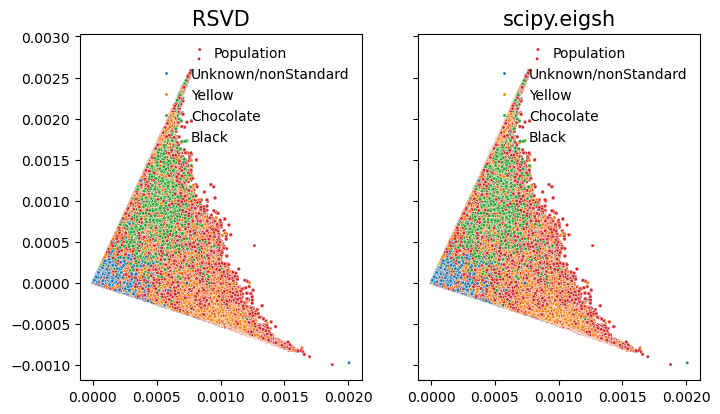

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(8,4.5), sharex=True, sharey=True)

# RSVD 
ax[0].set_title('RSVD', fontsize=15)
sns.scatterplot(x=U2[:,0], y=-U2[:,1], s=5, ax=ax[0], hue=pop_label2)

# scipy-eigsh
# the return value is in an ascending order w.r.t. eigenvalue
ax[1].set_title('scipy.eigsh', fontsize=15)
sns.scatterplot(x=eu[:,9], y=eu[:,8], s=5, ax=ax[1] , hue=pop_label2)

ax[0].legend(title='Population', frameon=False)
ax[1].legend(title='Population', frameon=False)

plt.show()

In [10]:
Lc=LInv.tocsc()

In [11]:
La = LInv.toarray()

In [12]:
vect = np.random.normal(size=2650)

In [13]:
np.array([vect])

array([[-1.38440102,  0.1336049 ,  1.49339855, ...,  1.59676149,
        -0.2897184 , -0.9443406 ]])

In [14]:
%time vect * Lc

CPU times: user 0 ns, sys: 300 μs, total: 300 μs
Wall time: 576 μs


array([-1.38440102,  5.09801389, -0.67570069, ...,  3.72975412,
       -0.68169768, -2.11103025])

In [15]:
%time vect @ La

CPU times: user 13.5 ms, sys: 10.9 ms, total: 24.4 ms
Wall time: 8.26 ms


array([-1.38440102,  5.09801389, -0.67570069, ...,  3.72975412,
       -0.68169768, -2.11103025])

In [16]:
%time np.transpose(np.array([vect])) * La

CPU times: user 90.2 ms, sys: 22.9 ms, total: 113 ms
Wall time: 38.4 ms


array([[-1.38440102, -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.1336049 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.49339855, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  3.72975412,
         0.        ,  0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.68169768, -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -2.11103025]])

In [17]:
%time np.transpose(vect) * La

CPU times: user 108 ms, sys: 24.9 ms, total: 133 ms
Wall time: 37.2 ms


array([[-1.38440102,  0.        ,  0.        , ...,  0.        ,
        -0.        , -0.        ],
       [-0.        ,  0.1336049 ,  0.        , ...,  0.        ,
        -0.        , -0.        ],
       [-0.        ,  0.        ,  1.49339855, ...,  0.        ,
        -0.        , -0.        ],
       ...,
       [-0.        ,  0.        ,  0.        , ...,  3.72975412,
        -0.        , -0.        ],
       [-0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.68169768, -0.        ],
       [-0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.        , -2.11103025]])

In [18]:
%time np.transpose(np.array([vect])) @ La

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2650 is different from 1)

In [19]:
%time np.transpose(vect) * Lc 

CPU times: user 346 μs, sys: 14 μs, total: 360 μs
Wall time: 309 μs


array([-1.38440102,  5.09801389, -0.67570069, ...,  3.72975412,
       -0.68169768, -2.11103025])

In [20]:
%time np.transpose(vect) @ Lc 

CPU times: user 192 μs, sys: 8 μs, total: 200 μs
Wall time: 170 μs


array([-1.38440102,  5.09801389, -0.67570069, ...,  3.72975412,
       -0.68169768, -2.11103025])

In [21]:
%time Lc @ vect 

CPU times: user 170 μs, sys: 7 μs, total: 177 μs
Wall time: 469 μs


array([-1.38440102,  0.1336049 ,  1.49339855, ...,  5.27915291,
        2.75139662, -0.40595772])

In [22]:
%time Lc * Lc

CPU times: user 0 ns, sys: 447 μs, total: 447 μs
Wall time: 394 μs


<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 16707 stored elements and shape (2650, 2650)>